CAO points Analysis 2021

10% A clear and concise overview of how to load CAO points information from the
CAO website into a pandas data frame pitched as your classmates.

20% A detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in pandas.

10% Appropriate plots and other visualisations to enhance your notebook for viewers.




# Conversion of raw HTML into CSV format
---
For this task I will firstly be using the regular expressions module to fetch the cao data from the cao website and then using this data I can then create a sequence of characters that will define a pattern for complex string matching (https://realpython.com/regex-python/) that will match the cao points data that I require.


In [247]:
import requests as rq
import re
import pandas as pd
import urllib.request as urlrq
import datetime as dt

In [248]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string. year/month/day and hour, minute,second
nowstr = now.strftime('%Y%m%d_%H%M%S')

# CAO points 2021

http://www.cao.ie/index.php?page=points&p=2021

In [249]:
# Fetch the CAO points URL.
url2021 = 'http://www.cao.ie/index.php?page=points&p=2021'
resp = rq.get('http://www.cao.ie/index.php?page=points&p=2021')

In [250]:
#create a file path for original date
pathhtml = 'cao/data2021_' + nowstr + '.html'
#pathhtml = 'data/url2021' + nowstr + '.html'

In [251]:
# The server uses the wrong encoding, to fix it.
#original_encoding = resp.encoding
#error with encoding, needs to be changed to cp1252.
resp.encoding = 'cp1252'

In [252]:
# Save the original html file to text file
with open(pathhtml, 'w') as f:
    f.write(resp.text)

FileNotFoundError: [Errno 2] No such file or directory: 'cao/data2021_20220110_122849.html'

In [253]:
url = "http://www.cao.ie/index.php?page=points&p=2021"

r = rq.get(url2021)
#with open('file.txt', 'w') as file:
with open(pathhtml, 'w') as f:
    f.write(resp.text)

FileNotFoundError: [Errno 2] No such file or directory: 'cao/data2021_20220110_122849.html'

In [254]:
urlrq.urlretrieve("http://www2.cao.ie/points/l8.php", "test.txt" )

('test.txt', <http.client.HTTPMessage at 0x12b5c263640>)

# Save original file

In [255]:
urlrq.urlretrieve ('http://www2.cao.ie/points/CAOPointsCharts2021.xlsx' , 'test.txt')

('test.txt', <http.client.HTTPMessage at 0x12b5c25e070>)

In [256]:
df = pd.read_excel ('http://www2.cao.ie/points/CAOPointsCharts2021.xlsx', skiprows =11)

In [257]:
df

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
0,Engineering and engineering trades,Music and Instrument Technology,AL605,211,NaN,NaN,NaN,211,NaN,319,6,Athlone Institute of Technology,NaN,NaN,NaN
1,Health,Pharmacy Technician,AL630,308,NaN,NaN,NaN,308,NaN,409,6,Athlone Institute of Technology,NaN,NaN,NaN
2,Health,Dental Nursing,AL631,311,NaN,NaN,NaN,311,NaN,400,6,Athlone Institute of Technology,NaN,NaN,NaN
3,Biological and related sciences,Applied Science,AL632,297,NaN,NaN,NaN,297,NaN,454,6,Athlone Institute of Technology,NaN,NaN,NaN
4,Business and administration,Business,AL650,AQA,NaN,AQA,NaN,AQA,NaN,351,6,Athlone Institute of Technology,NaN,avp,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Information and Communication Technologies (ICTs),Creative Computing,WD211,270,NaN,NaN,NaN,270,NaN,392,8,Waterford Institute of Technology,NaN,NaN,NaN
1447,Personal services,Recreation and Sport Management,WD212,262,NaN,NaN,NaN,262,NaN,304,8,Waterford Institute of Technology,NaN,NaN,NaN
1448,Engineering and engineering trades,Mechanical and Manufacturing Engineering,WD230,230,NaN,230,NaN,230,NaN,361,8,Waterford Institute of Technology,NaN,avp,NaN
1449,Welfare,Early Childhood Care and Education,WD231,266,NaN,NaN,NaN,266,NaN,366,8,Waterford Institute of Technology,NaN,NaN,NaN


In [258]:
#spot check of random row from data downloaded checking rows -13 to find
df.iloc [269]

CATEGORY (ISCED Description)                           Health
Course Title                            Mental Health Nursing
Course Code                                             CK720
R1 Points                                                 455
R1 Random                                                 NaN
R2 Points                                                 452
R2 Random                                                 NaN
EOS Points                                                452
EOS Random                                                NaN
EOS Midpoints                                             467
Course Level                                                8
HEI                             University College Cork (NUI)
Test/Interview                                            NaN
AVP                                                       NaN
v                                                         NaN
Name: 269, dtype: object

In [259]:
#check last row of data
df.iloc [1437]

CATEGORY (ISCED Description)          Business and administration
Course Title                          Marketing and Digital Media
Course Code                                                 WD193
R1 Points                                                     279
R1 Random                                                     NaN
R2 Points                                                     NaN
R2 Random                                                     NaN
EOS Points                                                    279
EOS Random                                                    NaN
EOS Midpoints                                                 358
Course Level                                                    8
HEI                             Waterford Institute of Technology
Test/Interview                                                NaN
AVP                                                           NaN
v                                                             NaN
Name: 1437

In [260]:
#fetching cao data from website
resp = rq.get ("http://www2.cao.ie/points/l8.php")
# check request, http code 200 means request has succeeded 
resp

<Response [200]>

In [261]:
# Loop through thr lines of the content fetched from cao website
#for line in resp.iter_lines():
    #print (line) 

In [262]:

# Compile the regular expression for matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')


In [263]:
# The file path for the csv file.
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'

In [264]:
# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


In [265]:
df2021 = pd.read_csv(path2021, encoding='cp1252')

In [266]:
df2021

cao2021 = df2021 [["code", "title", "pointsR1"]]
cao2021

,code,title,pointsR1
0,AL801,Software Design for Virtual Reality and Gaming,300
1,AL802,Software Design in Artificial Intelligence for...,313
2,AL803,Software Design for Mobile Apps and Connected ...,350
3,AL805,Computer Engineering for Network Infrastructure,321
4,AL810,Quantity Surveying,328
...,...,...,...
944,WD211,Creative Computing,270
945,WD212,Recreation and Sport Management,262
946,WD230,Mechanical and Manufacturing Engineering,230
947,WD231,Early Childhood Care and Education,266


# CAO points 2020

https://www.cao.ie/index.php?page=points&p=2020

In [267]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'
#fetching cao data from website
resp = rq.get ("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx")
# check request, http code 200 means request has succeeded 
resp

<Response [200]>

In [268]:
# Create a file path for the original data.
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

In [269]:
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20220110_122849.xlsx',
 <http.client.HTTPMessage at 0x12b5c238a90>)

In [280]:
# Download and parse the excel spreadsheet.
df2020 = pd.read_excel(url2020, skiprows=10)

In [281]:
df2020.head(20)

#cao2020 = df2020 [["COURSE CODE2", "R1 POINTS"]]
#cao2020


,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Education,Education & Design or Fine Art (Second Level T...,AD202,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arts,Fine Art (portfolio),AD204,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arts,Fashion Design (portfolio),AD211,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arts,Product Design (portfolio),AD212,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arts,Visual Culture,AD215,377,NaN,320,NaN,320,NaN,389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# CAO points 2019

https://www.cao.ie/index.php?page=points&p=2019

In [209]:
import camelot
import glob
import os
import csv

## Conversion of PDF into CSV

In [210]:
#tables = camelot.read_pdf('lvl8_19.pdf', pages = 'all')
#tables




In [211]:
#tables.export('cao.2019.pdf', f='csv', compress=True) # json, excel, html, markdown, sqlite
#tables[0]
#Table shape=(7, 7)
#tables[0].parsing_report
#{
    #'accuracy': 99.02,
    #'whitespace': 12.24,
   # 'order': 1,
   # 'page': 1
#}
#tables[0].to_csv('cao.19.pdf') # to_json, to_excel, to_html, to_markdown, to_sqlite
#tables[0].df # get a pandas DataFrame!


#url2019 = 'http://www2.cao.ie/points/lvl8_19.pdf'

#url2019 ='https://www.irishtimes.com/polopoly_fs/1.3987209.1565878557!/menu/standard/file/cao2019.pdf'

In [289]:
# I was not successful in creating csv using camelot therefore used excalibur which is powered by camelot
#Excalibur downloaded 'cao.2019.pdf' into 18 seperate CSV files, I saved these file in a folder 2019_data 
#below i have concatenated all of them and saved them to a file called merged_2019_data.csv. 
#in Pandas you can use with mode=a within the .to_csv() which means append.


for file in os.listdir("2019_data"):
    if file.endswith(".csv"):
        tmp = pd.read_csv(os.path.join("2019_data", file))
        tmp.to_csv("merged_2019_data.csv", index=False, header=False, mode='a')



In [285]:
#path2019 = 'merged_2019_data.csv' +nowstr + '.csv'
path2019 = r'C:\Users\suseh\OneDrive\Desktop\Fundamentals-of-Data-Analysis\cao2019_data.csv'

In [290]:
#using same regular expressions as for 2021 data
#try adding ... to end of re.compile

re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)[0-9]{3}(.*)')

In [291]:
#with open(path2019, encoding = 'cp850') as csv_file:
    #csv_reader = csv.reader(csv_file, delimiter=',')

In [292]:
# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path2019, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        #dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")



Total number of lines is 0.


In [217]:
df2019 = pd.read_csv(path2019)

In [218]:
df2019 = pd.read_csv (r"C:\Users\suseh\OneDrive\Desktop\Fundamentals-of-Data-Analysis\merged_2019_data.csv20220110_100308.csv")                   

In [219]:
df2019.tail (20)

,code,title,pointsR1,pointsR2
902,WD147,Pharmaceutical Science,288,NaN
903,WD150,Criminal Justice Studies,280,NaN
904,WD152,Visual Art,243,NaN
905,WD161,Computer Forensics and Security,270,NaN
906,WD162,Quantity Surveying,226,NaN
907,WD163,Psychology,456,NaN
908,WD186,Sports Coaching and Performance,261,NaN
909,WD187,Social Science,276,NaN
910,WD191,Agricultural Science,377,NaN
911,WD192,Social Care Practice,271,NaN


In [220]:
# check dataframe

#print first 5 lines
print (df2019.head())






    code                                              title pointsR1 pointsR2
0  AL801     Software Design for Virtual Reality and Gaming      300      NaN
1  AL802  Software Design in Artificial Intelligence for...      313      NaN
2  AL803  Software Design for Mobile Apps and Connected ...      350      NaN
3  AL805    Computer Engineering for Network Infrastructure      321      NaN
4  AL810                                 Quantity Surveying      328      NaN


In [221]:
#print last 5 lines
print (df2019.tail())

      code                                     title pointsR1 pointsR2
917  WD211                        Creative Computing      270      NaN
918  WD212           Recreation and Sport Management      262      NaN
919  WD230  Mechanical and Manufacturing Engineering      230      230
920  WD231        Early Childhood Care and Education      266      NaN
921  WD232              Business Information Systems      261      261


In [222]:
# get metadata of DataFrame
print(df2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      922 non-null    object
 1   title     922 non-null    object
 2   pointsR1  920 non-null    object
 3   pointsR2  254 non-null    object
dtypes: object(4)
memory usage: 28.9+ KB
None


## Concat and Join

In [223]:
courses2021 = df2021[['code', 'title']]
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [224]:
courses2020 = df2020[['COURSE CODE2','COURSE TITLE']]
courses2020.columns = ['code', 'title']
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [225]:
courses2019 = df2019[['code', 'title']]
courses2019

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
917,WD211,Creative Computing
918,WD212,Recreation and Sport Management
919,WD230,Mechanical and Manufacturing Engineering
920,WD231,Early Childhood Care and Education


In [226]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3330,WD211,Creative Computing
3331,WD212,Recreation and Sport Management
3332,WD230,Mechanical and Manufacturing Engineering
3333,WD231,Early Childhood Care and Education


In [227]:
allcourses.sort_values('code')

,code,title
175,AC120,International Business
949,AC120,International Business
2584,AC120,International Business
950,AC137,Liberal Arts
2585,AC137,Liberal Arts
...,...,...
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education
3333,WD231,Early Childhood Care and Education
948,WD232,Business Information Systems


In [228]:
allcourses.loc[175]['title']

'International Business'

In [229]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3330,WD211,Creative Computing
3331,WD212,Recreation and Sport Management
3332,WD230,Mechanical and Manufacturing Engineering
3333,WD231,Early Childhood Care and Education


In [230]:
# Returns a copy of the data frame with duplciates removed - based only on code.
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [231]:
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1512,WD188,Applied Health Care
1513,WD205,Molecular Biology with Biopharmaceutical Science
1514,WD206,Electronic Engineering
1515,WD207,Mechanical Engineering


## Join to points

In [282]:
# Set the index to the code column.
#df2019.set_index('code', inplace=True)
#allcourses.columns = ['title', 'points_r1_2021', 'points_r2_2021']
#df2019

#cao2021.set_index([['code']], inplace=True)
#cao2021.columns = [['title', 'points_r1_2021']]

#allcourses_index = pd.merge(df2021, df2020, df2019, right_index=True, left_index=True)
index = pd.concat([allcourses, df2021.reindex(allcourses.index), df2019.reindex(allcourses.index)], axis=1)
index


#cao2021

,code,title,code,title,pointsR1,pointsR2,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,AL801,Software Design for Virtual Reality and Gaming,300,NaN,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,AL802,Software Design in Artificial Intelligence for...,313,NaN,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,AL803,Software Design for Mobile Apps and Connected ...,350,NaN,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,AL805,Computer Engineering for Network Infrastructure,321,NaN,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,AL810,Quantity Surveying,328,NaN,AL810,Quantity Surveying,328,NaN
...,...,...,...,...,...,...,...,...,...,...
1512,WD188,Applied Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1513,WD205,Molecular Biology with Biopharmaceutical Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514,WD206,Electronic Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515,WD207,Mechanical Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
#allcourses.set_index('code', inplace=True)
allcourses = allcourses.join(df2021[['points_r1_2021']])
allcourses

KeyError: "None of [Index(['points_r1_2021'], dtype='object')] are in the [columns]"

In [181]:
# Set the index to the code column.
cao2020.set_index('code', inplace=True)
cao2020

KeyError: "None of ['code'] are in the columns"

In [117]:
allcourses = allcourses.join(df2021[['points_r1_2021']])
allcourses

ValueError: columns overlap but no suffix specified: Index(['points_r1_2021'], dtype='object')

In [102]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']
df2020_r1

,code,points_r1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [69]:
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [70]:
allcourses = allcourses.join(df2020_r1)
allcourses

,title,points_r1_2021,points_r1_2020
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
WD188,Applied Health Care,NaN,201
WD205,Molecular Biology with Biopharmaceutical Science,NaN,228
WD206,Electronic Engineering,NaN,179


In [78]:
df2019_r1 = df2019[['code', 'pointsR1']]
df2019_r1.columns = ['code', 'points_r1_2019']
df2019_r1

,code,points_r1_2019
0,AL801,300
1,AL802,313
2,AL803,350
3,AL805,321
4,AL810,328
...,...,...
917,WD211,270
918,WD212,262
919,WD230,230
920,WD231,266


In [79]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019
code,
AL801,300
AL802,313
AL803,350
AL805,321
AL810,328
...,...
WD211,270
WD212,262
WD230,230


In [80]:
allcourses = allcourses.join(df2019_r1)
allcourses


,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,300
AL802,Software Design in Artificial Intelligence for...,313,332,313
AL803,Software Design for Mobile Apps and Connected ...,350,337,350
AL805,Computer Engineering for Network Infrastructure,321,333,321
AL810,Quantity Surveying,328,319,328
...,...,...,...,...
WD188,Applied Health Care,NaN,201,NaN
WD205,Molecular Biology with Biopharmaceutical Science,NaN,228,NaN
WD206,Electronic Engineering,NaN,179,NaN


## Clean up data

KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

## Plots

In [193]:
#For plotting Graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#Trend graph
df = pd.DataFrame (allcourses)
df.tail ()
               

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
WD188,Applied Health Care,NaN,201,NaN
WD205,Molecular Biology with Biopharmaceutical Science,NaN,228,NaN
WD206,Electronic Engineering,NaN,179,NaN
WD207,Mechanical Engineering,NaN,198,NaN
WD208,Manufacturing Engineering,NaN,188,NaN


KeyError: 'points_r1_2019'

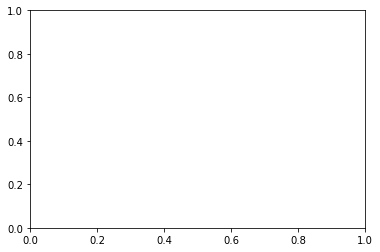

In [112]:
allcourses.plot(x="title", y="points_r1_2019", kind="scatter")

plt.plt ()
plt.show ()

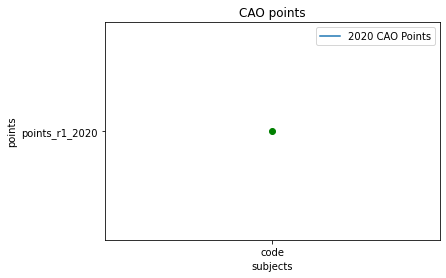

In [197]:
x1 = ['code']
y1 = ['points_r1_2019']

plt.plot(x1, y1, label='2020 CAO Points')

plt.xlabel('subjects')
plt.ylabel('points')
plt.title("CAO points")
plt.plot(y1, 'o:g', linestyle='--', linewidth='8')
plt.legend()

References

Encoding error - backing up data video https://web.microsoftstream.com/video/ae6d6edd-e6f4-4201-9fe3-7a6cf06eea9d?referrer=https:%2F%2Flearnonline.gmit.ie%2F

Camelot -https://pypi.org/project/camelot-py/

Excalibur: PDF Table Extraction for Humans — Excalibur 0.4.3 documentation (excalibur-py.readthedocs.io)
https://excalibur-py.readthedocs.io/en/master/


How to Concatenate Multiple CSV files in Python – Predictive Hacks - https://predictivehacks.com/?all-tips=how-to-concatenate-multiple-csv-files-in-python